# Exploratory Data Analysis of House Prices

- Veri seti [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)'dan alinmistir.

## ***Data Cleaning***
- Veri tipleri
- Eksik Degerler

### ***Veri tipleri***

- Veri tiplerini listele

In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

pd.options.display.float_format
# veri setini dataframe icerisine yukle
house_prices = pd.read_csv('train.csv')


print('\nHer bir degiskenin tipi:')
print('=======================================')
house_prices.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

- Surekli ve Kategorik degiskenleri belirle.

In [20]:
# object tipinde olmayan sutunlar surekli degiskenler listesine ayir
quantitative = [column for column in house_prices.columns if house_prices.dtypes[column] != 'object']

print('\nSurekli degiskenler : \n', quantitative)

print('\nSurekli degiskenlerin unique deger sayilari  :\n')
for column in quantitative:
    print(column + ' :' , house_prices[column].nunique())

# object tipinde olanlar kategorik degiskenler listesine ayir
qualitative = [column for column in house_prices.columns if house_prices.dtypes[column] == 'object']

print('\nKategorik degiskenler : \n', qualitative)
          
print('\KAtegorik degiskenlerin unique deger sayilari  :\n')
for column in qualitative:
    print(column + ' :', house_prices[column].nunique())


Surekli degiskenler : 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Surekli degiskenlerin unique deger sayilari  :

Id : 1460
MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
Gara

- Kategorik degiskenlerden surekli ozelligi gostern yok (unique deger sayilari beklendigi gibi usuk)

- Ancak surekli degiskenlerden unique deger sayisi 25 in altinda olanlari listeleyelim.

In [21]:
print('\nSurekli degiskenlerin unique deger sayilari 25 in altinda olanlar  :\n')
for column in quantitative:
    if house_prices[column].nunique() < 25:
        print(column + ' :' , house_prices[column].nunique())


Surekli degiskenlerin unique deger sayilari 25 in altinda olanlar  :

MSSubClass : 15
OverallQual : 10
OverallCond : 9
LowQualFinSF : 24
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageCars : 5
3SsnPorch : 20
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5


### ***Eksik degerler***
- Eksik degerleri inceleme
    - Eksik degerleri donusturme
    - Eksik degerleri doldurma

#### ***Eksik degerleri inceleme***

In [22]:
print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
house_prices.isnull().mean()*100


Her bir degiskenin null deger oranlari  (%):


Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.767
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.548
MasVnrArea       0.548
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinSF1       0.000
BsmtFinType2     2.603
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.068
1stFlrSF   

- Eksik degerlerin doldurmak icin uygun oldugu (eksik deger orani sifirdan buyuk %40 den kucuk) ve olmadigi (yaridan fazla eksik deger bulunan) degiskenler

In [23]:
# if column null value mean is higher than %40 it is not suitable for filling
not_fit_to_fill = [column for column in house_prices.columns if house_prices[column].isnull().mean() > 0.4]

# if column null value mean is lower than %40 it is suitable for filling
fit_to_fill = [column for column in house_prices.columns if (house_prices[column].isnull().mean() < 0.4 and house_prices[column].isnull().mean() != 0)]

print('\nEksik degeri olan ve orani % 40 den az olan  degiskenler \n ', fit_to_fill)
print('\nEksik deger orani % 40 den fazla olan degiskenler \n ', not_fit_to_fill)



Eksik degeri olan ve orani % 40 den az olan  degiskenler 
  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Eksik deger orani % 40 den fazla olan degiskenler 
  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


- Eksik degerlerin sutun ve satirlar bazinda gorsellestirilmesinde 4 sutunun neredeyse bos oldugu goruluyor.

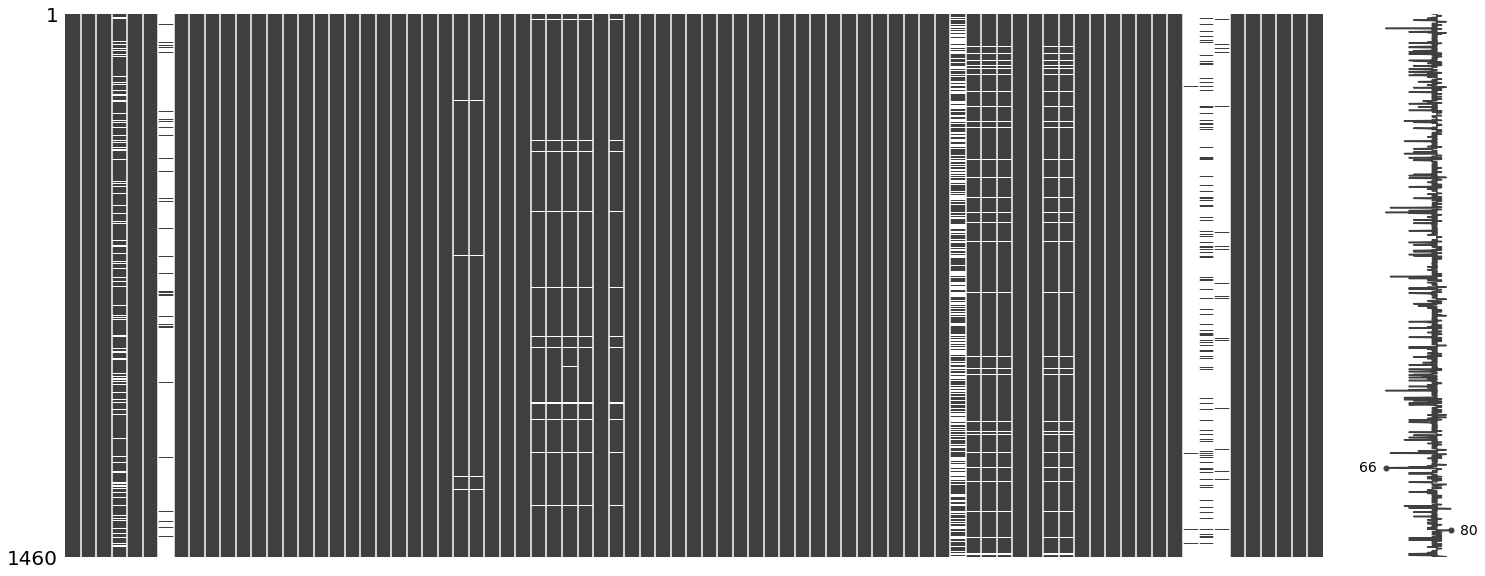

In [24]:
# missingno eksik sutunlari gorsellestirmeye yarar
missingno.matrix(house_prices)
plt.show()

- Eksik degerlerin bar grafigi

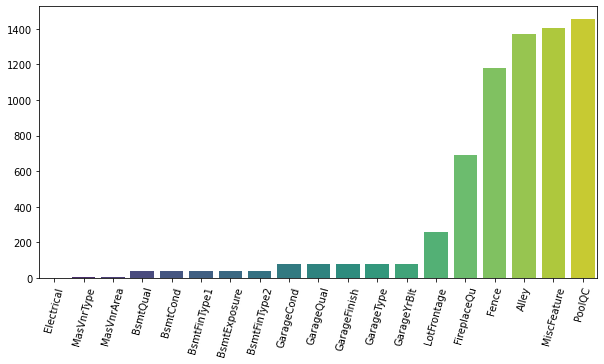

In [8]:
# null degerlerin toplamlarindan olusan seri
missing = house_prices.isnull().sum()

# where eksik degeri sifirdan buyukler icin null doner 
# dropna() ise bu null degerleri atar
missing = missing.where(lambda x : x>0).dropna()
# yukaridaki islemin kisa versiyonu  
# missing = missing[missing > 0]

# degerlere gore sirala
missing.sort_values(inplace=True)

# eksik degerler grafigi
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=75)
plt.show()

- Cok fazla eksik deger olan sutunlarda unique degerleri inceleyelim.

In [9]:
for column in not_fit_to_fill:
    print(column + ' :', house_prices[column].unique())

Alley : [nan 'Grvl' 'Pave']
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC : [nan 'Ex' 'Fa' 'Gd']
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


- Bu degiskenlerin data description verisini inceledigimizde one-hot ya da integer encoding yapabilecegimiz degiskenler gorulebilir:
    - Alley : Type of alley access to property 
        - Grvl: Gravel, 
        - Pave: Paved, 
        - NA: No alley access
    - PoolQC: Pool quality
        - Ex: Excellent        
        - Gd: Good       
        - TA: Average/Typical       
        - Fa: Fair       
        - NA: No Pool
    - Fence: Fence quality       
        - GdPrv: Good Privacy       
        - MnPrv: Minimum Privacy
        - GdWo: Good Wood
        - MnWw: Minimum Wood/Wire 
        - NA: No Fence
    - MiscFeature: Miscellaneous feature not covered in other categories 
        - Elev: Elevator        
        - Gar2: 2nd Garage (if not described in garage section)
        - Othr: Other 
        - Shed: Shed (over 100 SF)
        - TenC: Tennis Court
        - NA: None
    - FireplaceQu: Fireplace quality
        - Ex: Excellent - Exceptional Masonry Fireplace
        - Gd: Good - Masonry Fireplace in main level 
        - TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 
        - Fa: Fair - Prefabricated Fireplace in basement
        - Po: Poor - Ben Franklin Stove 
        - NA: No Fireplace

- PoolQC ve FireplaceQu degiskenleri, ordinal (siralama) oldugundan integer encoding uygulariz.
- Alley, Fence, MiscFeature degiskenleri ise nominal degiskenler oldugundan one hot encoding uygulariz.

#### ***Eksik degerleri donusturme***
- One hot encoding: nominal degiskenlere uygulanabilir
- Integer encoding: ordinal (siralama) degiskenlere uygulanabilir

In [10]:
#  encode edecegimiz house_prices i ayri tutalim
house_prices_encoded = house_prices.copy()

# eksik degerlerion fazla oldugu degiskenlerden nominal ve ordinal olmak uzere iki liste olusturduk
ordinals = ['PoolQC', 'FireplaceQu']
nominals = ['Alley','Fence','MiscFeature']

# nominal degiskenleri one hot encoding uygula ve dataframe ile birlestir 
for column in nominals:
    house_prices_encoded = pd.concat([house_prices_encoded, pd.get_dummies(house_prices_encoded[column], prefix=column)], axis=1)

# nominal degiskenleri artik df den cikarabiliriz
house_prices_encoded = house_prices_encoded.drop(nominals, axis=1)

# integer encoding icin mapping yapan bir sozluk olusturuldu
# None degerlere de sifir atandi
encode_nums = {"PoolQC":     {"Ex": 3, "Gd": 2, "Fa": 1, None: 0},
                "FireplaceQu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, None: 0}}

# pandas in replace metodu sozluk kullanarak mapping yapabiliyor ve 
# verileri sozluge gore degistriebiliyor
house_prices_encoded.replace(encode_nums, inplace=True)


- Simdi de eksik degerleri az olan degiskenleri inceleyelim.

In [17]:
# unique degerleri inceleyelim
for column in fit_to_fill:
    print(column + ' :', df[column].unique())

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 

#### ***Eksik degerleri doldurma***

- nan yerine sifir degeri konabilecek degiskenler.
    - LotFrontage
    - MasVnrArea

In [12]:
for column in ['LotFrontage', 'MasVnrArea']:
    house_prices_encoded[column].fillna(0, inplace=True)

- nan yerine 'None' string ifadesi doldurulacak degiskenler
    - MasVnrType (duvarda kullanilan malzeme tipi): 'BrkFace' 'None' 'Stone' 'BrkCmn' nan 
        - Degiskende zaten 'None' ifadesi de kullanilmis.
    - BsmtQual: 'Gd' 'TA' 'Ex' nan 'Fa'
    - BsmtCond: 'TA' 'Gd' nan 'Fa' 'Po'
    - BsmtExposure: 'No' 'Gd' 'Mn' 'Av' nan
    - BsmtFinType1: 'GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'
    - BsmtFinType2: 'GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'
    - GarageType : 'Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'
    - GarageFinish : 'RFn' 'Unf' 'Fin' nan
    - GarageQual : 'TA' 'Fa' 'Gd' nan 'Ex' 'Po'
    - GarageCond : 'TA' 'Fa' nan 'Gd' 'Po' 'Ex'

In [13]:
columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
           'GarageFinish', 'GarageQual', 'GarageCond' ]
for column in columns:
    house_prices_encoded[column].fillna('None', inplace=True)

- nan yerine o sutunda en cok bulunan deger (mod) ile doldurulacak degiskenler
    - GarageYrBlt
    - Electrical: 'SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan

In [14]:
for column in ['GarageYrBlt','Electrical']:
    # GarageYrBlt en sik gecen mod degeri ile dolduruldu
    house_prices_encoded[column].fillna(house_prices_encoded[column].mode()[0], inplace=True)

In [15]:
house_prices_encoded.isnull().mean()*100

Id                 0.000
MSSubClass         0.000
MSZoning           0.000
LotFrontage        0.000
LotArea            0.000
Street             0.000
LotShape           0.000
LandContour        0.000
Utilities          0.000
LotConfig          0.000
LandSlope          0.000
Neighborhood       0.000
Condition1         0.000
Condition2         0.000
BldgType           0.000
HouseStyle         0.000
OverallQual        0.000
OverallCond        0.000
YearBuilt          0.000
YearRemodAdd       0.000
RoofStyle          0.000
RoofMatl           0.000
Exterior1st        0.000
Exterior2nd        0.000
MasVnrType         0.000
MasVnrArea         0.000
ExterQual          0.000
ExterCond          0.000
Foundation         0.000
BsmtQual           0.000
BsmtCond           0.000
BsmtExposure       0.000
BsmtFinType1       0.000
BsmtFinSF1         0.000
BsmtFinType2       0.000
BsmtFinSF2         0.000
BsmtUnfSF          0.000
TotalBsmtSF        0.000
Heating            0.000
HeatingQC          0.000


## ***Outlier Detection***

- Gorsellestirme
- z score
- IQR score (Tukey yontemi)

***Gorsellestirme yontemi***
- Boxplot grafigi ile degiskenler gozlemlenir

In [ ]:
house_prices_clean = house_prices_encoded.copy()
sns.boxplot(x=boston_df['DIS'])